In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/traffic_prediction_dataset.zip

Archive:  /content/drive/MyDrive/traffic_prediction_dataset.zip
  inflating: traffic prediction dataset/sms-call-internet-mi-2013-11-04.txt  
  inflating: traffic prediction dataset/sms-call-internet-mi-2013-11-05.txt  
  inflating: traffic prediction dataset/sms-call-internet-mi-2013-11-06.txt  
  inflating: traffic prediction dataset/sms-call-internet-mi-2013-11-07.txt  
  inflating: traffic prediction dataset/sms-call-internet-mi-2013-11-08.txt  
  inflating: traffic prediction dataset/sms-call-internet-mi-2013-11-09.txt  
  inflating: traffic prediction dataset/sms-call-internet-mi-2013-11-10.txt  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import sklearn.metrics as mt
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
import glob
filenames = glob.glob("/content/traffic prediction dataset/*.txt")

#Set the column names for the data read
col_list = ['gridID', 'timeInterval', 'countryCode', 'smsIn', 'smsOut', 'callIn', 'callOut', 'internet']

#Read each tab separated file into Pandas DataFrame
for file in filenames:
    read_data = pd.read_csv(file, sep='\t',header=None, names=col_list, parse_dates=True)

In [ ]:
yeni_arr = []
yeni_arr = read_data.dropna().values[:, -5:]

In [ ]:
total_activity = read_data.dropna()['smsIn'].values + read_data.dropna()['smsOut'].values + read_data.dropna()['callIn'].values + read_data.dropna()['callOut'].values + read_data.dropna()['internet'].values
print(total_activity.shape)
print(yeni_arr.shape)

(1083018,)
(1083018, 5)


In [ ]:
y = []
for i in range(1083018):
  if total_activity[i]>0 and total_activity[i]<20:
    y.append("1")
  elif total_activity[i]>20 and total_activity[i]<40:
    y.append("2")
  elif total_activity[i]>40 and total_activity[i]<60:
    y.append("3")
  elif total_activity[i]>60 and total_activity[i]<80:
    y.append("4")
  elif total_activity[i]>80 and total_activity[i]<100:
    y.append("5")
  else:
    y.append("6")


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(yeni_arr, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [ ]:
a = 0
b= 0
c = 0
d = 0
e = 0
f = 0
for i in range(1051966):
  if y[i] == '6':
    a = a+1
  elif y[i] == '5':
    b = b+1
  elif y[i] == '4':
    c = c+1
  elif y[i] == '3':
    d = d+1
  elif y[i] == '2':
    e = e+1
  else:
    f = f+1

print(a, b, c, d, e, f)

296462 66822 99131 140589 190386 258576


**CNN MODEL**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 6
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_val_one_hot = keras.utils.to_categorical(y_val, num_classes)

# Reshape the feature data to be compatible with CNN
x_train = x_train.reshape(-1, 5, 1, 1)
x_val = x_val.reshape(-1, 5, 1, 1)

# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 1), activation='relu', input_shape=(5, 1, 1)),
    layers.Conv2D(64, (3, 1), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_one_hot, epochs=20, batch_size=10000, validation_data = (x_val, y_val_one_hot))

# Once the model is trained, you can use it to predict new samples:
# X_test should be a numpy array with shape (number of test samples, 5), containing the test feature data
# Assuming you have your data loaded into X_test
#x_test = x_test.reshape(-1, 5, 1, 1)
#y_pred_one_hot = model.predict(x_test)
#y_pred = np.argmax(y_pred_one_hot, axis=1)

NameError: name 'y_train' is not defined

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 1), activation='relu', input_shape=(5, 1, 1)),
    layers.Conv2D(64, (3, 1), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

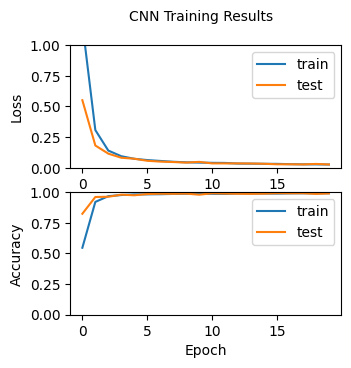

In [ ]:
from matplotlib import pyplot
plt.figure(figsize=(3.5, 3.5))
pyplot.subplot(211)
#pyplot.title('Loss')
#plt.xlabel('Epoch')
plt.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.ylim([0,1])
pyplot.legend()
#plot accuracy during training
pyplot.subplot(212)
#pyplot.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
plt.ylim([0,1])
pyplot.legend()
footnote_text = 'CNN Training Results'
plt.figtext(0.5, 0.95, footnote_text, ha='center', fontsize=10)
pyplot.show()

**DNN MODEL**

In [ ]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential()

# Add the input layer
model.add(tf.keras.layers.Dense(200, activation='relu', input_shape=(5,)))

# Add 6 hidden layers with ReLU activation and 200 MLP units each
for _ in range(6):
    model.add(tf.keras.layers.Dense(200, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1200      
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dense_6 (Dense)             (None, 200)               4

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
y_train = np.array(y_train)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
class_labels = sorted(list(set(y_train)))
label_to_int = {label: idx for idx, label in enumerate(class_labels)}
int_to_label = {idx: label for label, idx in label_to_int.items()}  # Add this line
y_train = np.array([label_to_int[label] for label in y_train])
y_val = np.array([label_to_int[label] for label in y_val])
y_test = np.array([label_to_int[label] for label in y_test])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(x_train, y_train, epochs=20, batch_size=10000, validation_data = (x_val, y_val))

Epoch 1/20
78/78 [==============================] - 32s 389ms/step - loss: 1.2914 - accuracy: 0.4747 - val_loss: 1.2870 - val_accuracy: 0.5305
Epoch 2/20
78/78 [==============================] - 29s 369ms/step - loss: 0.8572 - accuracy: 0.6620 - val_loss: 0.4343 - val_accuracy: 0.8276
Epoch 3/20
78/78 [==============================] - 29s 372ms/step - loss: 0.5142 - accuracy: 0.8036 - val_loss: 0.2200 - val_accuracy: 0.9147
Epoch 4/20
78/78 [==============================] - 29s 371ms/step - loss: 0.2919 - accuracy: 0.8798 - val_loss: 0.2000 - val_accuracy: 0.9549
Epoch 5/20
78/78 [==============================] - 28s 361ms/step - loss: 0.1349 - accuracy: 0.9759 - val_loss: 0.0906 - val_accuracy: 0.9906
Epoch 6/20
78/78 [==============================] - 29s 370ms/step - loss: 0.1456 - accuracy: 0.9381 - val_loss: 0.1009 - val_accuracy: 0.9644
Epoch 7/20
78/78 [==============================] - 29s 379ms/step - loss: 0.0955 - accuracy: 0.9728 - val_loss: 0.1480 - val_accuracy: 0.9213

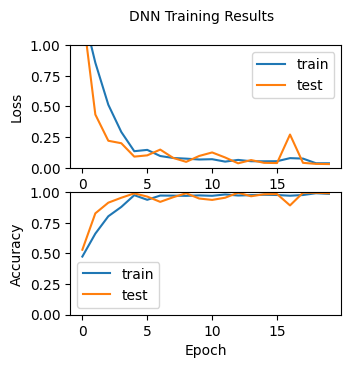

In [ ]:
from matplotlib import pyplot
plt.figure(figsize=(3.5, 3.5))
pyplot.subplot(211)
#pyplot.title('Loss')
#plt.xlabel('Epoch')
plt.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.ylim([0,1])
pyplot.legend()
#plot accuracy during training
pyplot.subplot(212)
#pyplot.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
plt.ylim([0,1])
pyplot.legend()
footnote_text = 'DNN Training Results'
plt.figtext(0.5, 0.95, footnote_text, ha='center', fontsize=10)
pyplot.show()

In [ ]:
predics = []
#test = yeni_arr_tr.reshape(1, -1)
test_data = []
for i in range(10000):
  test_data = yeni_arr[i]
  test_data = test_data.reshape(1,-1)
  predics.append(np.argmax((model.predict(test_data)), axis=1))
  del test_data

In [ ]:
for i in range(10000):
  if predics[i] == 0:
    predics[i] = "1"
  elif predics[i] == 1:
    predics[i] = "2"
  elif predics[i] == 2:
    predics[i] = "3"
  elif predics[i] == 3:
    predics[i] = "4"
  elif predics[i] == 4:
    predics[i] = "5"
  elif predics[i] == 5:
    predics[i] = "6"

In [ ]:
sum = 0
for i in range(10000):
  if predics[i] == y[i]:
    sum = sum+1

print(sum/10000)

0.9851


In [ ]:
# @title
test_res = []
test_res = y[0:1000]
f1_score(test_res, predics, average=None)

# Unsupervised model denemesi

In [ ]:
#num_clusters = 6

#pca = PCA(n_components=2)
#reduced_data = pca.fit_transform(yeni_arr)

# Create a KMeans instance and fit the model to the data
kmeans = KMeans(n_clusters=6)
kmeans.fit(yeni_arr)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

print("Cluster centers:")
print(cluster_centers)

print("Cluster labels for each data point:")
print(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers:
[[1.19120580e+00 1.02612054e+00 1.15881036e+00 1.30098414e+00
  2.62563943e+01]
 [2.13114378e+01 1.69071796e+01 1.97298541e+01 2.11174186e+01
  5.33626145e+02]
 [1.72979885e+02 9.40892094e+01 1.27910034e+02 1.43184104e+02
  3.12579648e+03]
 [1.10237357e+01 8.83698140e+00 1.05912842e+01 1.15698441e+01
  2.74095049e+02]
 [4.76005264e+00 3.77924091e+00 4.62881045e+00 5.13910199e+00
  1.09543270e+02]
 [3.94156463e+01 2.84907980e+01 3.63010061e+01 3.87771771e+01
  1.00410200e+03]]
Cluster labels for each data point:
[0 0 0 ... 0 0 0]


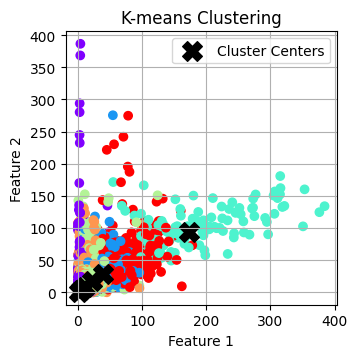

In [ ]:
plt.figure(figsize=(3.5, 3.5))
plt.scatter(yeni_arr[:, 0], yeni_arr[:, 1], c=labels, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, marker='X', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


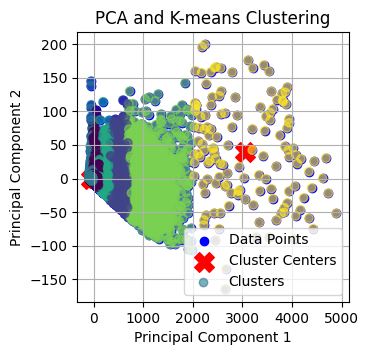

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


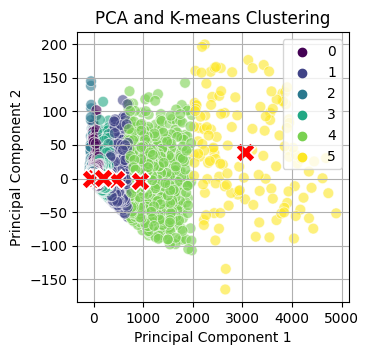

In [ ]:
plt.figure(figsize=(3.5, 3.5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', label='Data Points')

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

# Plot the cluster assignments for each data point
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Clusters')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(3.5, 3.5))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='viridis', alpha=0.6, s=60)
sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', s=200, marker='X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering')
plt.grid(True)
plt.show()

In [ ]:
for i in range(10000):
  if labels[i] == 0:
    labels[i] = '1'
  elif labels[i] == 1:
    labels[i] = '2'
  elif labels[i] == 2:
    labels[i] = '3'
  elif labels[i] == 3:
    labels[i] = '4'
  elif labels[i] == 4:
    labels[i] = '5'
  elif labels[i] == 5:
    labels[i] = '6'

In [ ]:
for i in range(10000):
  if y[i] == '1':
    y[i] = 1
  elif y[i] == '2':
    y[i] = 2
  elif y[i] == '3':
    y[i] = 3
  elif y[i] == '4':
    y[i] = 4
  elif y[i] == '5':
    y[i] = 5
  elif y[i] == '6':
    y[i] = 6

In [ ]:
sum = 0
for i in range(10000):
  if labels[i] == y[i]:
    sum = sum+1
  else:
    sum = sum

print(sum)

In [ ]:
del x_train,y_train